<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten

from urllib.request import urlretrieve
from zipfile import ZipFile
from PIL import Image

In [2]:
import httpimport

with httpimport.remote_repo('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main'):
    from data import get_data

In [3]:
seed = 0

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = get_data('CNN')

In [5]:
model_layers = [
    Input(X_train.shape[1:4]),
    
    Conv2D(64, (3, 3)),
    MaxPool2D(pool_size=(2, 2,)),

    Conv2D(32, (3, 3)),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(16, (3, 3)),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),

    Dense(64),

    Dense(10, activation='softmax')
]

model = Sequential(model_layers)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 286, 430, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 143, 215, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 141, 213, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 106, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 68, 104, 16)       4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 52, 16)       0

In [8]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
19/19 [==============================] - 12s 265ms/step - loss: 1600.7405 - accuracy: 0.1117 - val_loss: 533.7248 - val_accuracy: 0.2500
Epoch 2/20
19/19 [==============================] - 2s 121ms/step - loss: 443.2830 - accuracy: 0.2433 - val_loss: 262.3395 - val_accuracy: 0.1800
Epoch 3/20
19/19 [==============================] - 2s 123ms/step - loss: 221.1514 - accuracy: 0.3700 - val_loss: 95.1469 - val_accuracy: 0.3900
Epoch 4/20
19/19 [==============================] - 2s 124ms/step - loss: 77.7160 - accuracy: 0.5050 - val_loss: 91.4958 - val_accuracy: 0.3050
Epoch 5/20
19/19 [==============================] - 2s 125ms/step - loss: 36.7927 - accuracy: 0.6300 - val_loss: 151.0278 - val_accuracy: 0.2800
Epoch 6/20
19/19 [==============================] - 2s 121ms/step - loss: 45.2207 - accuracy: 0.6600 - val_loss: 44.0873 - val_accuracy: 0.4750
Epoch 7/20
19/19 [==============================] - 2s 123ms/step - loss: 7.0304 - accuracy: 0.8500 - val_loss: 32.7034 - val_ac

In [9]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {accuracy}')

19/19 [==============================] - 1s 46ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Training Accuracy: 1.0


In [10]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 39ms/step


In [11]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.75      0.63        20
           1       0.77      0.85      0.81        20
           2       0.80      0.20      0.32        20
           3       0.55      0.55      0.55        20
           4       0.42      0.95      0.58        20
           5       0.76      0.65      0.70        20
           6       0.89      0.85      0.87        20
           7       0.78      0.35      0.48        20
           8       0.82      0.45      0.58        20
           9       0.42      0.50      0.45        20

    accuracy                           0.61       200
   macro avg       0.68      0.61      0.60       200
weighted avg       0.68      0.61      0.60       200



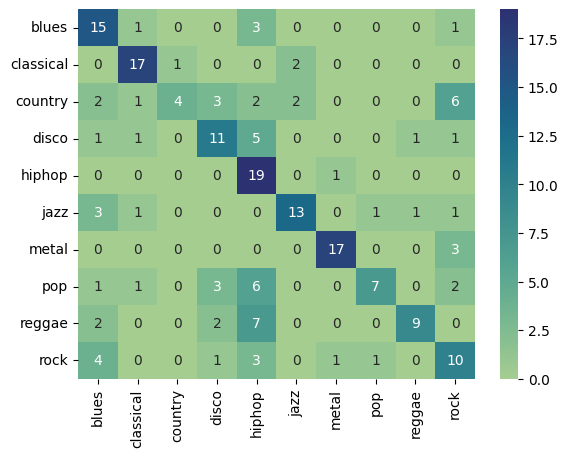

In [12]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('CNN_Confusion_Matrix.png', dpi=300)

In [13]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.61


In [14]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.75
classical,0.85
country,0.20
disco,0.55
hiphop,0.95
jazz,0.65
metal,0.85
pop,0.35
reggae,0.45
rock,0.50


In [15]:
model.save('CNN.h5')